## Week 3 - Machine Learning or Classification

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

### Dataset
In this homework, we will use the California Housing Prices data from Kaggle.

Here's a wget-able link:

```python
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```
We'll keep working with the 'median_house_value' variable, and we'll transform it to a classification task.

### Features
For the rest of the homework, you'll need to use only these columns:

- 'latitude',  
- 'longitude',  
- 'housing_median_age',  
- 'total_rooms',  
- 'total_bedrooms',  
- 'population',
- 'households',
- 'median_income',
- 'median_house_value',
- 'ocean_proximity',

In [2]:
Features = ['latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income',
            'median_house_value',
            'ocean_proximity']

### Data preparation
- Select only the features from above and fill in the missing values with 0.
- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
- Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [5]:
df = pd.read_csv('data/housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.shape

(20640, 10)

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [14]:
#@ The listed features are already filtered in the downloaded dataset
df = df.loc[:,df.columns.isin(Features)]

In [18]:
assert(set(df.columns.to_list()) == set(Features))

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
#@ the shape of the dataframe is the same considering no column was left out
df.shape

(20640, 10)

In [17]:
#@ Verifying how many NAs there are in the dataset
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
#@ filling missing values with zero
df = df.fillna(0)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [20]:
#@ Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df['rooms_per_household'] = df['total_rooms'] / df['households']

/tmp/ipykernel_12365/2930263709.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=30, ax=ax, layout=(1, 3), column=["rooms_per_household", "total_rooms", "households"])


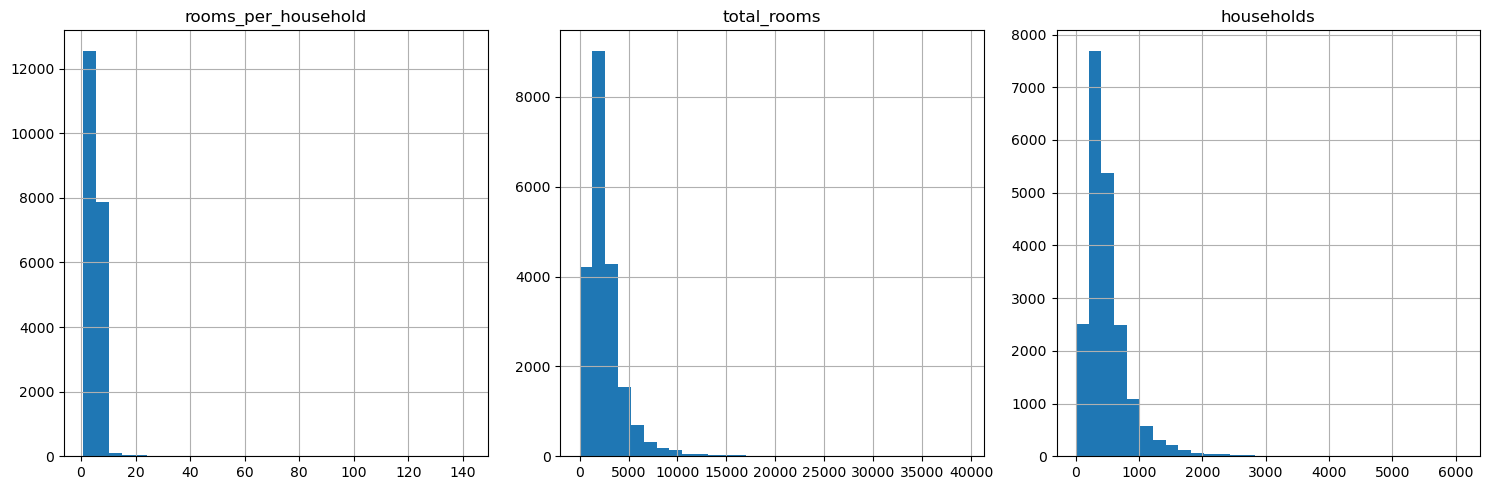

In [29]:
#@ INSPECTING HISTOGRAM:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()
df.hist(bins=30, ax=ax, layout=(1, 3), column=["rooms_per_household", "total_rooms", "households"])
plt.tight_layout()
plt.show()

In [31]:
#@ Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

/tmp/ipykernel_12365/1479885878.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=30, ax=ax, layout=(1, 3), column=["bedrooms_per_room", "total_bedrooms", "total_rooms"])


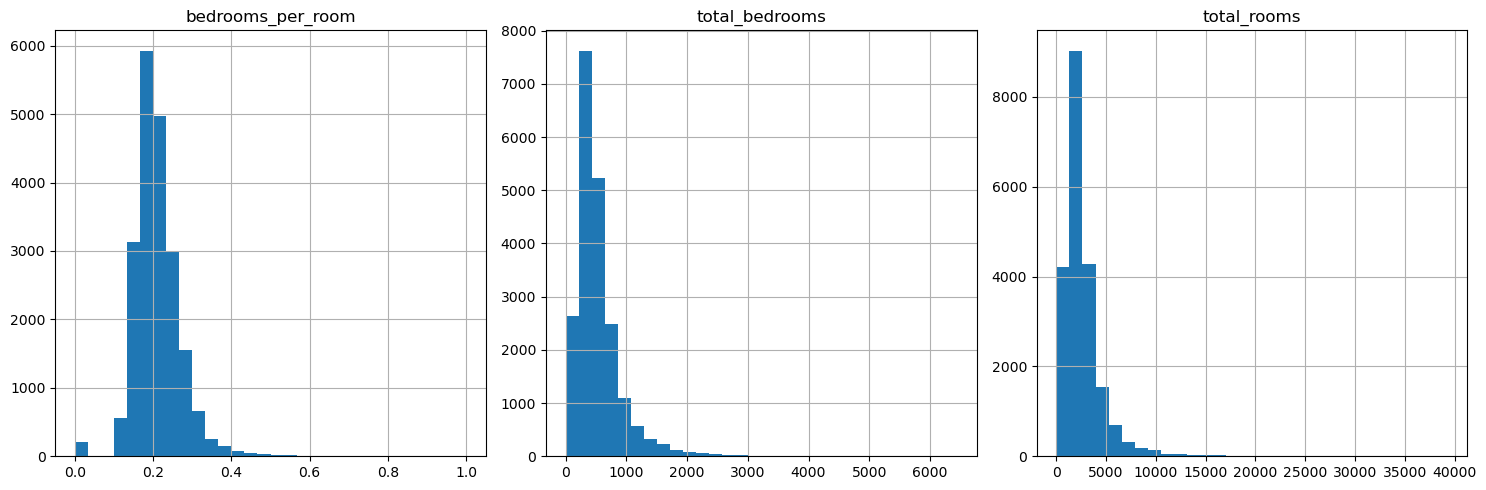

In [32]:
#@ INSPECTING HISTOGRAM:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()
df.hist(bins=30, ax=ax, layout=(1, 3), column=["bedrooms_per_room", "total_bedrooms", "total_rooms"])
plt.tight_layout()
plt.show()

In [33]:
#@ Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = df['population'] / df['households']

/tmp/ipykernel_12365/3604024809.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=30, ax=ax, layout=(1, 3), column=["population_per_household", "population", "households"])


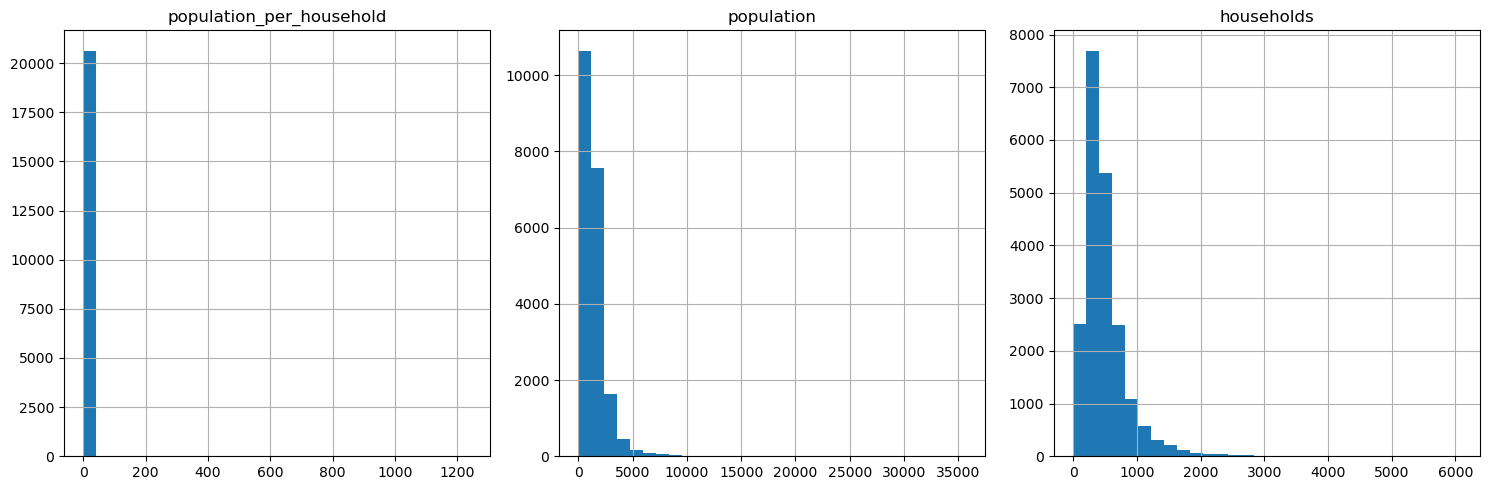

In [34]:
#@ INSPECTING HISTOGRAM:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()
df.hist(bins=30, ax=ax, layout=(1, 3), column=["population_per_household", "population", "households"])
plt.tight_layout()
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [41]:
# Color Palettes
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]
df.describe().T.style.bar(subset=['mean'],color=colors[3]).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
longitude,20640.000000,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20640.000000,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
housing_median_age,20640.000000,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20640.000000,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,39320.000000
total_bedrooms,20640.000000,532.476211,422.678333,0.000000,292.000000,431.000000,643.250000,6445.000000
population,20640.000000,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
households,20640.000000,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6082.000000
median_income,20640.000000,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
median_house_value,20640.000000,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,500001.000000
rooms_per_household,20640.000000,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091


### Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

Options:

- NEAR BAY
- <1H OCEAN
- INLAND
- NEAR OCEAN

In [49]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [54]:
#@ Another waw to do it
df['ocean_proximity'].value_counts().idxmax()

'<1H OCEAN'

R/ the answer is '<1H OCEAN'

### Question 2
- Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?  

Options:

- total_bedrooms and households
- total_bedrooms and total_rooms
- population and households
- population_per_household and total_rooms

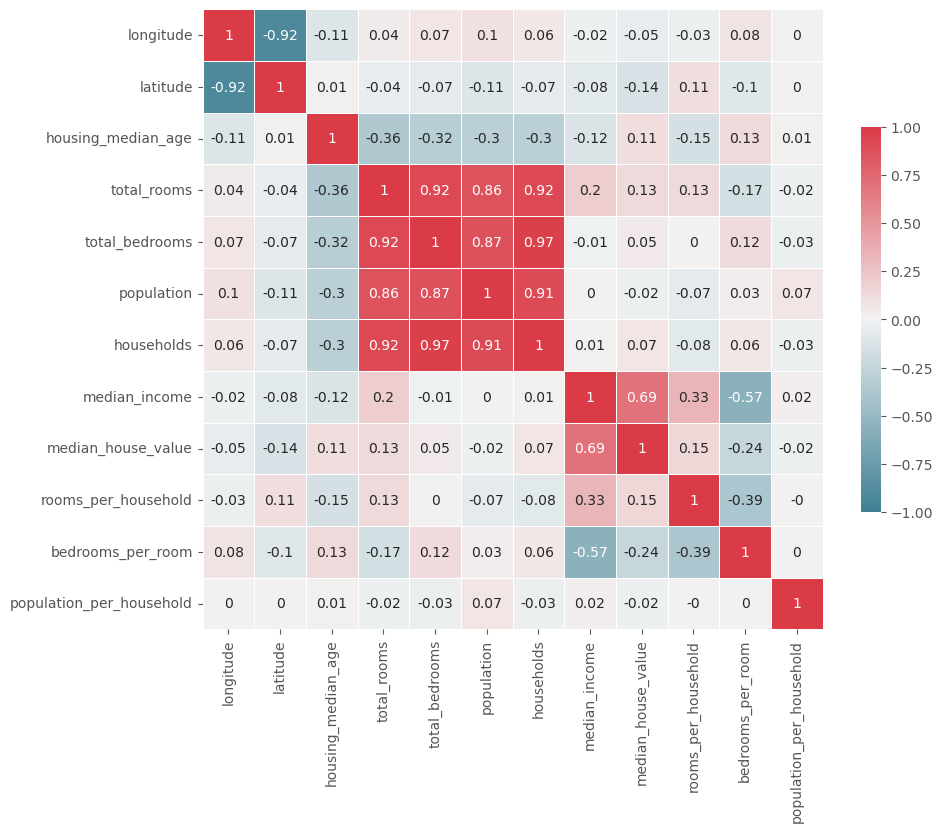

In [66]:
#@ COMPUTE THE CORRELATION MATRIX
df_correlations = df.corr().round(2)

# Draw the heatmap with the correct aspect ratio
plt.figure(figsize= (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations, vmax=1, vmin=-1, cmap=cmap, 
            center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [99]:
#@ ANOTHER WAY TO DO IT
df2 = df.copy()
df2.drop(['ocean_proximity'], axis=1, inplace=True)

In [96]:
df2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'above_average'],
      dtype='object')

In [98]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df2, 3))

Top Absolute Correlations
total_bedrooms  households        0.966507
longitude       latitude          0.924664
total_rooms     total_bedrooms    0.920196
dtype: float64


R/ The two features that have the biggest correlation are total_bedrooms and households with a correlation of 0.97

#### Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [68]:
df['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

In [70]:
df['above_average'] = df['median_house_value'].apply(lambda x: 1 if x > df['median_house_value'].mean() else 0)

In [72]:
df['above_average'].value_counts()

0    12255
1     8385
Name: above_average, dtype: int64

In [73]:
df['above_average'].unique()

array([1, 0])

#### Split the data
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value (median_house_value) is not in your dataframe.

In [102]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [103]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [105]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [106]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [107]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [108]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'above_average'],
      dtype='object')

### Question 3
- Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.
- Round it to 2 decimals using round(score, 2)
- What is their mutual information score?  
  
Options:

- 0.26
- 0
- 0.10
- 0.16

In [111]:
score = mutual_info_score(df_train.above_average, df_train.ocean_proximity)
round(score, 2)

0.1

R/ The mutual information score between above_average and ocean_proximity is 0.1

### Question 4
- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.  

Options:

- 0.60
- 0.72
- 0.84
- 0.95


In [ ]:
#@ ONE-HOT ENCODING OF ocean_proximity


In [ ]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

### Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
    - total_rooms
    - total_bedrooms
    - population
    - households

### Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.  

If there are multiple options, select the smallest alpha.

Options:

- 0
- 0.01
- 0.1
- 1
- 10